In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Placement_MLR.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [20]:
df = df.drop(columns=['workex','degree_t','hsc_s','gender','sl_no','ssc_b', 'hsc_b', 'etest_p', 'specialisation', 'mba_p', 'salary', 'degree_p'])
df.head()

,ssc_p,hsc_p,status
0,67.00,91.00,Placed
1,79.33,78.33,Placed
2,65.00,68.00,Placed
3,56.00,52.00,Not Placed
4,85.80,73.60,Placed


In [21]:
df['status'] = df['status'].apply(lambda x: 1 if x == 'Placed' else 0)
df.head()

,ssc_p,hsc_p,status
0,67.00,91.00,1
1,79.33,78.33,1
2,65.00,68.00,1
3,56.00,52.00,0
4,85.80,73.60,1


In [22]:
from sklearn.model_selection import train_test_split


# Split the data into features (X) and target (y)
# Assuming the target variable is 'placement_status' and the features are 'ssc_p', 'hsc_p', and 'degree_p'
X = df[['ssc_p', 'hsc_p']]
y = df['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the training and test sets
print("Training features:\n", X_train)
print("Training labels:\n", y_train)
print("Test features:\n", X_test)
print("Test labels:\n", y_test)


Training features:
      ssc_p  hsc_p
93   52.00   62.0
84   70.00   63.0
95   73.00   78.0
137  67.00   63.0
210  80.60   82.0
..     ...    ...
106  61.08   50.0
14   62.00   47.0
92   60.23   69.0
179  77.80   64.0
102  77.00   61.0

[172 rows x 2 columns]
Training labels:
 93     0
84     1
95     1
137    1
210    1
      ..
106    0
14     0
92     1
179    0
102    1
Name: status, Length: 172, dtype: int64
Test features:
      ssc_p  hsc_p
200  69.00  60.00
212  67.00  67.00
138  82.00  64.00
176  59.00  60.00
15   65.00  75.00
111  51.00  54.00
168  48.00  51.00
73   64.60  83.83
204  74.00  73.00
139  77.00  70.00
158  67.00  63.00
30   64.00  73.50
186  52.00  64.00
9    58.00  70.00
67   80.92  78.50
175  63.00  62.00
171  80.00  80.00
18   63.00  66.00
153  49.00  59.00
66   83.00  74.00
185  88.00  72.00
142  85.00  60.00
79   69.00  62.00
25   52.58  54.60
104  69.00  63.00
145  89.40  65.66
189  54.00  77.60
16   63.00  66.20
45   76.00  64.00
150  71.00  58.66
108  61.0

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


In [25]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print("Accuracy Score:")
print(accuracy)

Confusion Matrix:
[[ 5  7]
 [ 3 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.80      0.90      0.85        31

    accuracy                           0.77        43
   macro avg       0.71      0.66      0.67        43
weighted avg       0.75      0.77      0.75        43

Accuracy Score:
0.7674418604651163


In [26]:
# Get prediction probabilities
y_prob = model.predict_proba(X_test)[:, 1]

In [27]:
# Define thresholds
thresholds = np.arange(0.1, 1.0, 0.1)

# Function to calculate TPR and FPR
def calculate_tpr_fpr(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    return tpr, fpr

# Lists to store TPR and FPR for each threshold
tpr_list = []
fpr_list = []

# Calculate confusion matrix, TPR, and FPR for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred_threshold)
    tpr, fpr = calculate_tpr_fpr(y_test, y_pred_threshold)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    print(f"Threshold: {threshold}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"True Positive Rate (TPR): {tpr}")
    print(f"False Positive Rate (FPR): {fpr}")
    print("\n")



Threshold: 0.1
Confusion Matrix:
[[ 3  9]
 [ 1 30]]
True Positive Rate (TPR): 0.967741935483871
False Positive Rate (FPR): 0.75


Threshold: 0.2
Confusion Matrix:
[[ 3  9]
 [ 1 30]]
True Positive Rate (TPR): 0.967741935483871
False Positive Rate (FPR): 0.75


Threshold: 0.30000000000000004
Confusion Matrix:
[[ 4  8]
 [ 1 30]]
True Positive Rate (TPR): 0.967741935483871
False Positive Rate (FPR): 0.6666666666666666


Threshold: 0.4
Confusion Matrix:
[[ 4  8]
 [ 3 28]]
True Positive Rate (TPR): 0.9032258064516129
False Positive Rate (FPR): 0.6666666666666666


Threshold: 0.5
Confusion Matrix:
[[ 5  7]
 [ 3 28]]
True Positive Rate (TPR): 0.9032258064516129
False Positive Rate (FPR): 0.5833333333333334


Threshold: 0.6
Confusion Matrix:
[[ 8  4]
 [ 4 27]]
True Positive Rate (TPR): 0.8709677419354839
False Positive Rate (FPR): 0.3333333333333333


Threshold: 0.7000000000000001
Confusion Matrix:
[[ 9  3]
 [ 5 26]]
True Positive Rate (TPR): 0.8387096774193549
False Positive Rate (FPR): 0.25



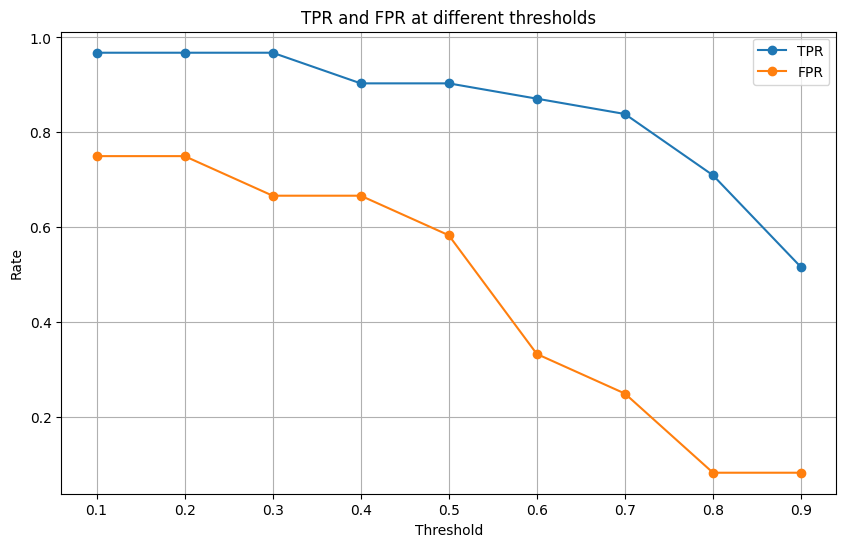

In [28]:
# Plot TPR and FPR
plt.figure(figsize=(10, 6))
plt.plot(thresholds, tpr_list, label='TPR', marker='o')
plt.plot(thresholds, fpr_list, label='FPR', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR at different thresholds')
plt.legend()
plt.grid(True)
plt.show()